By: Michał Marusiński, Jan Łucarz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Starting of by importing preprocessed data

In [2]:
data = pd.read_csv(r"D:\Studia\Workshop\Models\valid_patients_data.csv")

In [3]:
print(data.shape)
data.head()

(18620, 14)


,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
0,0.0,0.0,173.0,87.767878,87.767878,0.001703,90.190618,3.0,14.737,0.005782,90.190618,6.0,10.296,0.005782
1,1.0,1.0,149.0,104.943973,104.943973,0.003452,107.046095,7.0,27.327,0.013047,107.046095,3.0,30.303,0.013047
2,2.0,2.0,5.0,137.397414,137.397414,0.007579,140.316976,3.0,9.902,0.012221,140.316976,5.0,5.624,0.012221
3,3.0,3.0,212.0,150.274517,150.274517,0.001352,151.598203,7.0,12.557,0.014221,151.598203,3.0,5.729,0.014221
4,4.0,4.0,9.0,164.203495,164.203495,0.010700,166.333420,5.0,9.221,0.013314,166.333420,4.0,2.346,0.013314


Splitting the valence / arousal ratings into high (6-9) and low (1-5)

In [4]:
def valence_apply(row):
        return 'low valence' if row in list(range(1,6,1)) else 'high valence'
def arousal_apply(row):
        return 'low arousal' if row in list(range(1,6,1)) else 'high arousal'

In [5]:
data['Valence behaviour'] = data['Valence_rating.response'].apply(valence_apply)
data['Arousal behaviour'] = data['Arousal_rating.response'].apply(arousal_apply)

Creating machine learning models - starting of with data selection and changes: string (high / low) --> binary(1 / 0) and deleting response rating columns

In [6]:
data['Valence behaviour'] = np.where( data['Valence behaviour'] == 'high valence', 1, 0)
data['Arousal behaviour'] = np.where( data['Arousal behaviour'] == 'high arousal', 1, 0)

#deleting response ratings columns
data.drop(['Valence_rating.response', 'Arousal_rating.response'], inplace = True, axis = 1)
#useless column
data.drop('trials.thisIndex', inplace = True, axis = 1)

In [7]:
data.columns

Index(['trials.thisTrialN', 'trials.thisN', 'text_4.started', 'image.started',
       'mouse.started', 'Valence.started', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.rt',
       'Arousal_rating.started', 'Valence behaviour', 'Arousal behaviour'],
      dtype='object')

Importing our 6 models - kNN, DT, RF, XGB, SVC, LGBM

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

Choose a target data to be predicted - here Valence

In [9]:
target = 'Valence behaviour'
target_name = target.split(' ')[0]

Basic split of the data - we choose here split 80 / 20

In [10]:
X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In case of kNN and SVM use, we need to rescale the values to make it adjustable for algorithms.
For others, it's optional as their efficiency may improve. Here we do not rescale values, so only 4 of the algorithms will be used - LightGBM, RF, DT, XGBoost

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementation of classifiers with non-specific hyperparameters

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm"}

In a loop, Fitting each of them to training values

Accuracy: 0.5939849624060151
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      2293
           1       0.44      0.20      0.28      1431

    accuracy                           0.59      3724
   macro avg       0.53      0.52      0.50      3724
weighted avg       0.55      0.59      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Valence.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Valence.png


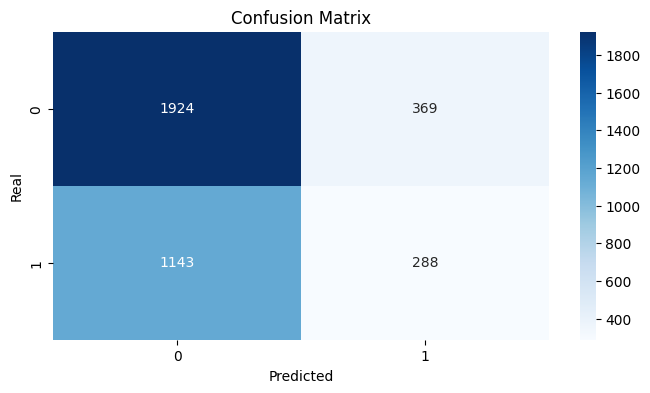

Accuracy: 0.541890440386681
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2293
           1       0.41      0.41      0.41      1431

    accuracy                           0.54      3724
   macro avg       0.52      0.52      0.52      3724
weighted avg       0.54      0.54      0.54      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Valence.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Valence.png


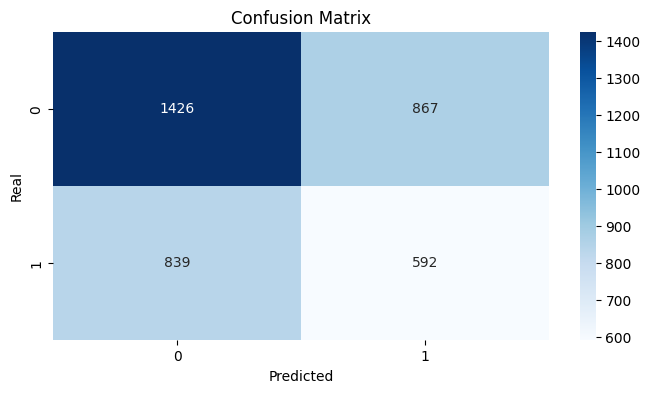

Accuracy: 0.582438238453276
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.70      2293
           1       0.42      0.23      0.30      1431

    accuracy                           0.58      3724
   macro avg       0.52      0.52      0.50      3724
weighted avg       0.55      0.58      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\classification_report_Valence.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\confusion_matrix_Valence.png


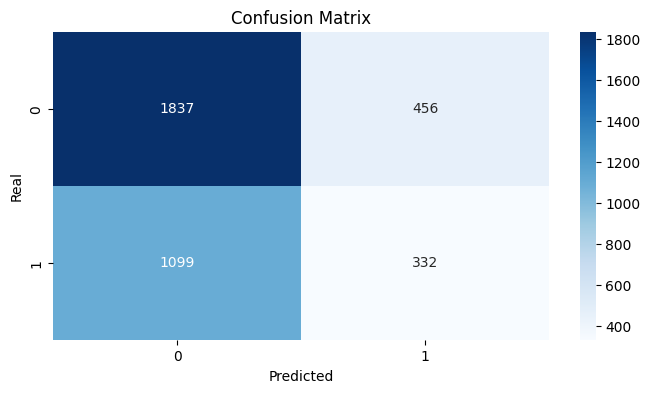

[LightGBM] [Info] Number of positive: 5659, number of negative: 9237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379901 -> initscore=-0.489970
[LightGBM] [Info] Start training from score -0.489970
Accuracy: 0.6133190118152524
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.94      0.75      2293
           1       0.48      0.09      0.15      1431

    accuracy                           0.61      3724
   macro avg       0.55      0.51      0.45      3724
weighted avg       0.57      0.61      0.52      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\lightgbm\classification_

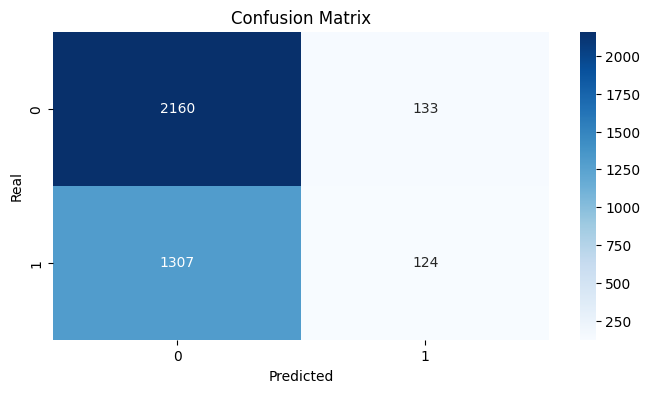

In [12]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred, name_of_classifier=model_name, feature_predicted = target_name)


Implementation of same models but with tuners included ( 10 - K Validation with Tuner)

In [13]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm"}


In [14]:
from param_grids import param_grids

RandomForestClassifier()
Accuracy: 0.6119763694951665
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      2293
           1       0.43      0.03      0.06      1431

    accuracy                           0.61      3724
   macro avg       0.52      0.50      0.41      3724
weighted avg       0.55      0.61      0.49      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Valence_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Valence_cross_validation.png


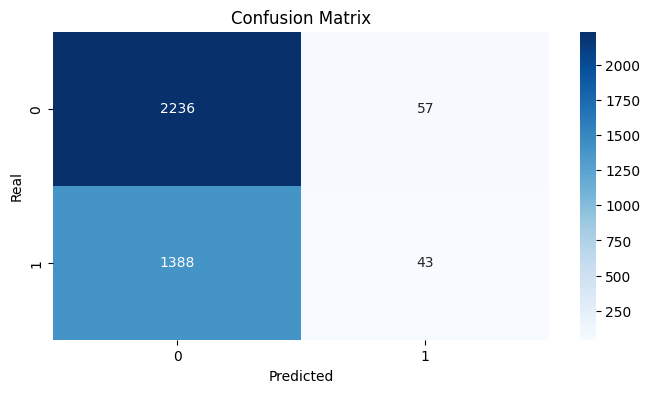

DecisionTreeClassifier()
Accuracy: 0.5912996777658431
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.91      0.73      2293
           1       0.36      0.08      0.13      1431

    accuracy                           0.59      3724
   macro avg       0.49      0.50      0.43      3724
weighted avg       0.52      0.59      0.50      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Valence_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Valence_cross_validation.png


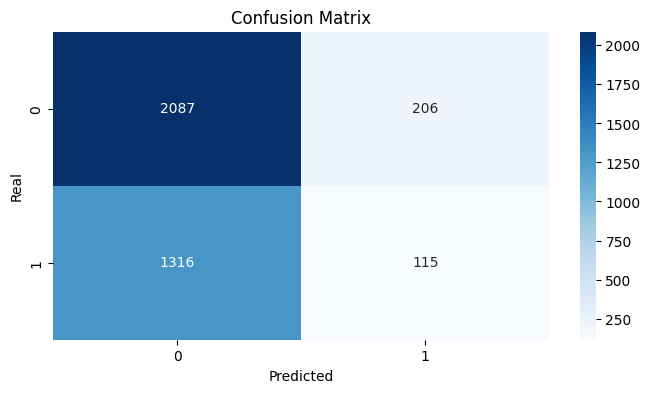

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.6130504833512352
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      2293
           1       0.34      0.01      0.02      1431

    accuracy              

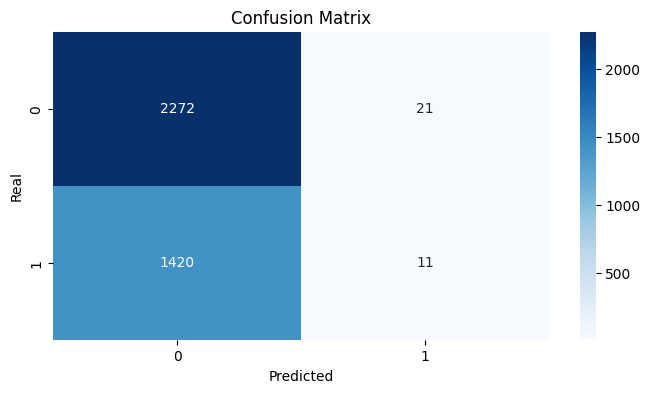

LGBMClassifier()
[LightGBM] [Info] Number of positive: 5093, number of negative: 8313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379905 -> initscore=-0.489954
[LightGBM] [Info] Start training from score -0.489954
[LightGBM] [Info] Number of positive: 5093, number of negative: 8313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379905 -> initscore=-0.489954
[LightGBM] [Info] Start training from score -0.489954

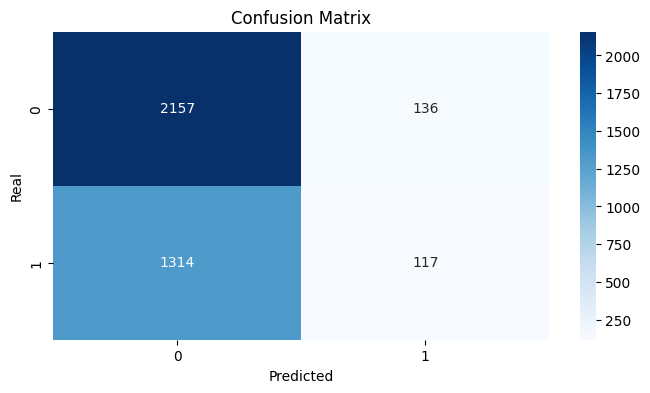

In [15]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True)

We switch the target from Valence to Arousal behaviour

In [16]:
target = 'Arousal behaviour'
target_name = target.split(" ")[0]

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm"}

Accuracy: 0.7701396348012889
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2888
           1       0.41      0.06      0.10       836

    accuracy                           0.77      3724
   macro avg       0.60      0.52      0.48      3724
weighted avg       0.70      0.77      0.70      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Arousal.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Arousal.png


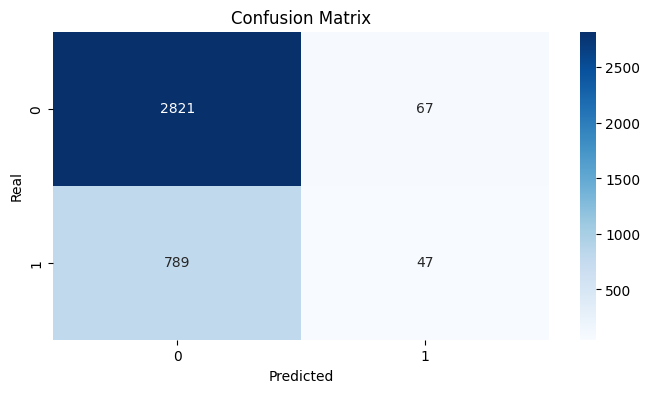

Accuracy: 0.6670247046186896
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2888
           1       0.27      0.29      0.28       836

    accuracy                           0.67      3724
   macro avg       0.53      0.53      0.53      3724
weighted avg       0.68      0.67      0.67      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Arousal.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Arousal.png


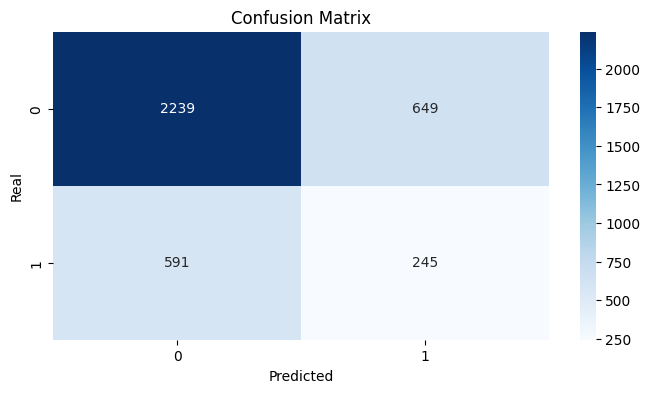

Accuracy: 0.764500537056928
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2888
           1       0.39      0.08      0.14       836

    accuracy                           0.76      3724
   macro avg       0.59      0.52      0.50      3724
weighted avg       0.70      0.76      0.70      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\classification_report_Arousal.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\confusion_matrix_Arousal.png


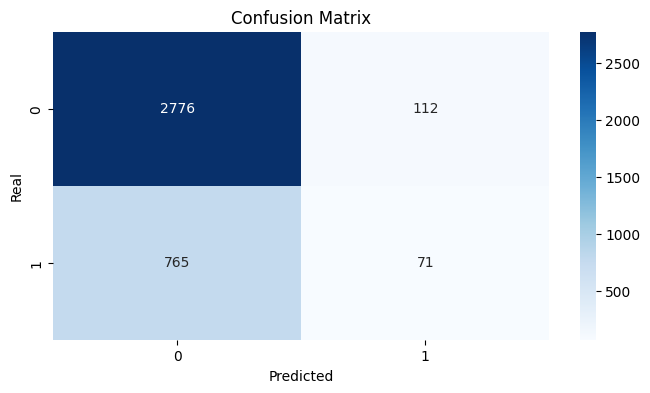

[LightGBM] [Info] Number of positive: 3391, number of negative: 11505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227645 -> initscore=-1.221657
[LightGBM] [Info] Start training from score -1.221657
Accuracy: 0.7741675617615468
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2888
           1       0.45      0.03      0.05       836

    accuracy                           0.77      3724
   macro avg       0.62      0.51      0.46      3724
weighted avg       0.71      0.77      0.69      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\lightgbm\classification

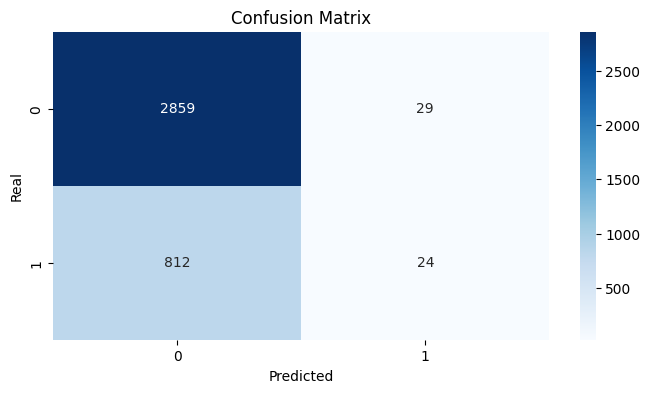

In [18]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred,
                          name_of_classifier=model_name,
                          feature_predicted = target_name)


In [19]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm"}


RandomForestClassifier()
Accuracy: 0.7741675617615468
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2888
           1       0.14      0.00      0.00       836

    accuracy                           0.77      3724
   macro avg       0.46      0.50      0.44      3724
weighted avg       0.63      0.77      0.68      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Arousal_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Arousal_cross_validation.png


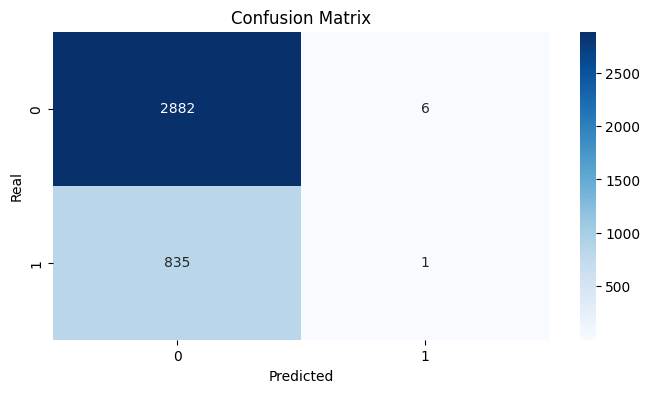

DecisionTreeClassifier()
Accuracy: 0.7279806659505907
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2888
           1       0.23      0.09      0.13       836

    accuracy                           0.73      3724
   macro avg       0.50      0.50      0.49      3724
weighted avg       0.65      0.73      0.68      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Arousal_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Arousal_cross_validation.png


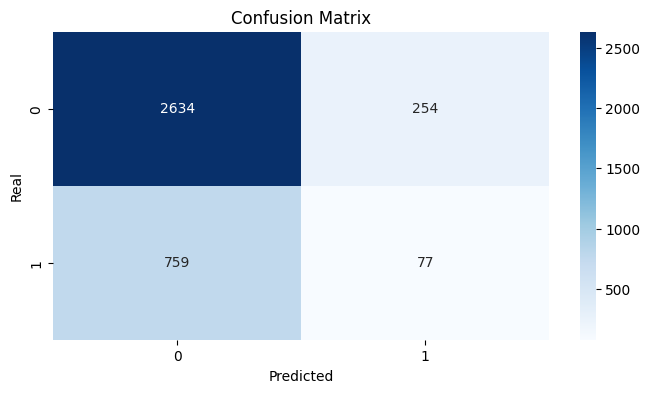

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.765843179377014
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2888
           1       0.29      0.03      0.05       836

    accuracy               

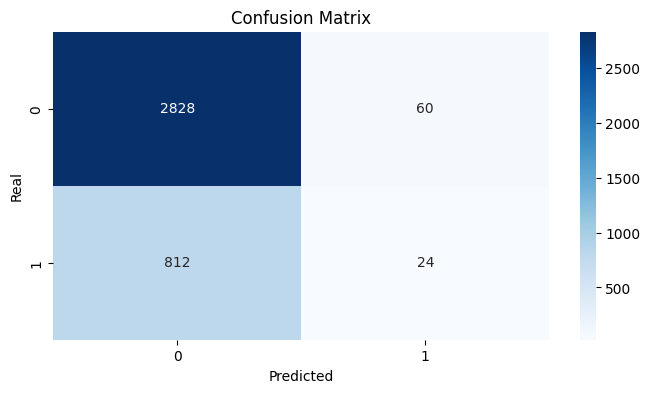

LGBMClassifier()
[LightGBM] [Info] Number of positive: 3051, number of negative: 10355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227585 -> initscore=-1.222000
[LightGBM] [Info] Start training from score -1.222000
[LightGBM] [Info] Number of positive: 3052, number of negative: 10354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227659 -> initscore=-1.221576
[LightGBM] [Info] Start training from score -1.2215

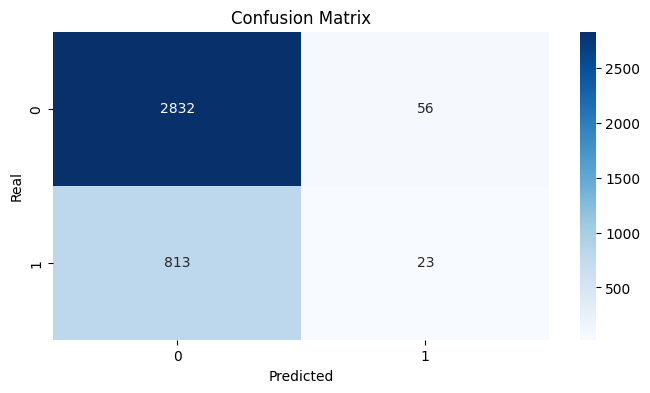

In [20]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True)